### This is the RISK Logistics EDA

### https://www.tensorflow.org/tutorials/structured_data/time_series

In [1]:
import matplotlib.pyplot as plt

In [2]:
import xlrd

In [3]:
import sys
import re
import pandas as pd
import numpy as np

In [4]:
import datetime

In [5]:
data_path='/media/lnr-ai/christo/github_repos/logistics/data/'

In [6]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

### Risk data files

In [7]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
onlyfiles

['ef45e112-e9b9-41a5-bfd0-895ab2f2b2d0.xlsx',
 '.~lock.5ced192c-9302-4f48-80cc-411e67c992cd.xlsx#',
 '042d072e-2d6f-4359-91f0-98af2e535b95.xlsx',
 '0574c1d5-217e-4130-8315-ee5808e29d6a.xlsx',
 '184ee536-a91c-4b70-8cc6-ac097859d76a.xlsx',
 '5ced192c-9302-4f48-80cc-411e67c992cd.xlsx',
 '9f7a6ca1-18cb-4c03-9f7b-0ff712648e68.xlsx',
 'Accident Log.xlsx',
 'Asset Master.xlsx',
 'AssetMaster.csv (txt)',
 'Asset_Types.csv (txt)',
 'Bakers_Events.csv',
 'c0119a0b-e984-46ee-adfd-76505c82fe3f.xlsx',
 'Copy of Accident Log.xlsx',
 'data pipe delimited.csv',
 'dc09f1ff-c688-4e48-bfc6-2339340f7941.xlsx',
 'Driver Master.xlsx',
 'Drivers.csv (txt)',
 'driver_event_train_df.csv',
 'ebd02545-85c6-41ac-b63f-550cd38a65d0.xlsx',
 'ef012e73-d60b-41d4-bdcc-0672bf3af45d.xlsx',
 'Events Library Master.xlsx',
 'Events.csv (txt)',
 'Events.xlsx',
 'Event_Library.csv (txt)',
 'f7f7d1c0-0643-4c41-8660-6fbdbc3f5905.xlsx',
 'fa741711-a2ab-4f0a-974f-cf7f89d8dbc9.xlsx',
 'Fuel Consumption & Events Data (1).xlsx',
 'F

In [8]:
originalflist=['ef45e112-e9b9-41a5-bfd0-895ab2f2b2d0.xlsx',
 '042d072e-2d6f-4359-91f0-98af2e535b95.xlsx',
 '0574c1d5-217e-4130-8315-ee5808e29d6a.xlsx',
 '184ee536-a91c-4b70-8cc6-ac097859d76a.xlsx',
 '5ced192c-9302-4f48-80cc-411e67c992cd.xlsx',
 '9f7a6ca1-18cb-4c03-9f7b-0ff712648e68.xlsx']

### The drivers master file

In [9]:
filename=originalflist[0]
df0=pd.read_excel('/media/lnr-ai/christo/github_repos/logistics/data/{filename}'.format(filename=filename), sheet_name='Sheet1')

In [10]:
list(df0)

['=rowno()',
 '=if(rowno(TOTAL) <= 1000000,1,\r\n\tif(rowno(TOTAL) <= 2000000,2,\n    \tif(rowno(TOTAL) <= 3000000,3,\n        \tif(rowno(TOTAL) <= 4000000,4,\n            \tif(rowno(TOTAL) <= 5000000,5,\n                \tif(rowno(TOTAL) <= 6000000,6,\n                    \tif(rowno(TOTAL) <= 7000000,7,\n                        \tif(rowno(TOTAL) <= 8000000,8,\n                            \tif(rowno(TOTAL) <= 9000000,9,\n                                \tif(rowno(TOTAL) <= 10000000,10\n                                    \t,11))))))))))',
 '[ER Serial Number]',
 'Trigger',
 'Fleet Number',
 'License Number',
 'Company',
 'Behaviour Category',
 'Collision Outcome',
 'Event Date',
 'Event Time',
 '# of Events',
 'Longitude_Latitude']

In [11]:
rename_dict={'[ER Serial Number]':'er_serial_number','Trigger':'trigger',
            'Fleet Number':'fleet_number',
             'License Number':'license_number',
             'Company':'company',
             'Behaviour Category':'behaviour_category',
             'Collision Outcome':'collision_outcome',
             'Event Date':'event_date',
                'Event Time':'event_time',
             '# of Events':'nEvents',
             'Longitude_Latitude':'longitude_latitude'
            }

In [12]:
df0.rename(columns=rename_dict,inplace=True)

### Behaviour Category

In [13]:
set(df0['behaviour_category'])

{'#Not Specified',
 '-',
 'Distraction',
 'Driver Condition',
 'Driver Conduct',
 'Other Concerns',
 'Poor Awareness',
 'Traffic Violations'}

### trigger

In [14]:
set(df0['trigger'])

{'-', 'Accelerating', 'Braking', 'Cornering', 'Other', 'Rough/Uneven Surface'}

### company

In [15]:
set(df0['company'])

{'360 Logistics - DriveReport',
 'A Van Der Walt Transport (Pty) Ltd - DriveReport',
 'A&B Replacement Parts Ltd - DriveRisk',
 'A-Z Fuel - DriveReport',
 'A2Z CELLULAR SUPPLIERS CC - DriveReport',
 'ABF Legend Logistics - DriveReport',
 'AEL Intelligent Blasting - DriveReport',
 'AHG AU - DRA',
 'AKD Softwoods AU - DRA',
 'ALS Group - DriveReport',
 'AUS Post - DRA',
 'Active Construction & Equipment - DriveReport',
 'Afgri Animal Feeds - DriveReport',
 'Africa Link Transport - DriveReport',
 'Africa fuel Distributors (Pty) Ltd - DriveReport',
 'Afrox - DriveReport',
 'Air Liquide Healthcare AU - DRA',
 'Air Products - DriveReport',
 'Albe Linehaul Limited NZ - IVCS',
 'Alexander Gases NZ - IVCS',
 'All Brick Transport - DriveReport',
 'Allied Petroleum NZ - IVCS',
 'Allied Steelrode (Pty) Ltd - DriveReport',
 'Alurod (Pty) Ltd – DriveReport',
 'Anax Logistics - DriveRisk',
 'Anderson Transport - DriveRisk',
 'Anglo American - DriveReport',
 'Armada Trading 021 (Pty) Ltd - DriveReport

### collision_outcome

In [16]:
set(df0['collision_outcome'])

{'-', 'Collision', 'Near Collision', 'Possible Collision'}

In [17]:
df0['response']=0
df0.loc[df0['collision_outcome'].isin(['Collision', 'Near Collision', 'Possible Collision']),'response']=1

### Date time conversion

In [18]:
event_date_list=list(set(df0['event_date']))

In [19]:
event_date_list.sort()

In [20]:
event_date_list

[Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-04-02 00:00:00'),
 Timestamp('2020-04-03 00:00:00'),
 Timestamp('2020-04-04 00:00:00'),
 Timestamp('2020-04-05 00:00:00'),
 Timestamp('2020-04-06 00:00:00'),
 Timestamp('2020-04-07 00:00:00'),
 Timestamp('2020-04-08 00:00:00'),
 Timestamp('2020-04-09 00:00:00'),
 Timestamp('2020-04-10 00:00:00'),
 Timestamp('2020-04-11 00:00:00'),
 Timestamp('2020-04-12 00:00:00'),
 Timestamp('2020-04-13 00:00:00'),
 Timestamp('2020-04-14 00:00:00'),
 Timestamp('2020-04-15 00:00:00'),
 Timestamp('2020-04-16 00:00:00'),
 Timestamp('2020-04-17 00:00:00'),
 Timestamp('2020-04-18 00:00:00'),
 Timestamp('2020-04-19 00:00:00'),
 Timestamp('2020-04-20 00:00:00'),
 Timestamp('2020-04-21 00:00:00'),
 Timestamp('2020-04-22 00:00:00'),
 Timestamp('2020-04-23 00:00:00'),
 Timestamp('2020-04-24 00:00:00'),
 Timestamp('2020-04-25 00:00:00'),
 Timestamp('2020-04-26 00:00:00'),
 Timestamp('2020-04-27 00:00:00'),
 Timestamp('2020-04-28 00:00:00'),
 Timestamp('2020-04-

In [21]:
df0['event_day_seconds']=(df0['event_time'].astype(int) - df0['event_date'].astype(int))/10e8
df0['event_day_seconds']=df0['event_day_seconds'].astype(int)

In [22]:
df0['event_day_seconds']

0         62531
1         62539
2         60771
3         60771
4         17753
          ...  
615250    43529
615251    44225
615252    29748
615253    50003
615254    50131
Name: event_day_seconds, Length: 615255, dtype: int64

In [23]:
df0['dayofweek']=df0['event_time'].dt.dayofweek

In [24]:
df0.response==1

0          True
1          True
2          True
3          True
4          True
          ...  
615250    False
615251    False
615252    False
615253    False
615254    False
Name: response, Length: 615255, dtype: bool

In [25]:
response_date_list=list(set(df0[df0.response==1]['event_date']))
response_date_list.sort()

In [26]:
response_date_list

[Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-04-02 00:00:00'),
 Timestamp('2020-04-03 00:00:00'),
 Timestamp('2020-04-04 00:00:00'),
 Timestamp('2020-04-05 00:00:00'),
 Timestamp('2020-04-06 00:00:00'),
 Timestamp('2020-04-07 00:00:00'),
 Timestamp('2020-04-08 00:00:00'),
 Timestamp('2020-04-09 00:00:00'),
 Timestamp('2020-04-10 00:00:00'),
 Timestamp('2020-04-11 00:00:00'),
 Timestamp('2020-04-12 00:00:00'),
 Timestamp('2020-04-13 00:00:00'),
 Timestamp('2020-04-14 00:00:00'),
 Timestamp('2020-04-15 00:00:00'),
 Timestamp('2020-04-16 00:00:00'),
 Timestamp('2020-04-17 00:00:00'),
 Timestamp('2020-04-18 00:00:00'),
 Timestamp('2020-04-19 00:00:00'),
 Timestamp('2020-04-20 00:00:00'),
 Timestamp('2020-04-21 00:00:00'),
 Timestamp('2020-04-22 00:00:00'),
 Timestamp('2020-04-23 00:00:00'),
 Timestamp('2020-04-24 00:00:00'),
 Timestamp('2020-04-25 00:00:00'),
 Timestamp('2020-04-26 00:00:00'),
 Timestamp('2020-04-27 00:00:00'),
 Timestamp('2020-04-28 00:00:00'),
 Timestamp('2020-04-

### Geo location data

https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

Convert the longitude_latitude string column into two columns of type float:

In [27]:
df0['Longitude_Latitude_conv']=df0['longitude_latitude'].map(lambda x: x.strip('[]') )
df0[['longitude','latitude']]=df0['Longitude_Latitude_conv'].str.split(',',expand = True)
df0['latitude']=df0['latitude'].astype(float)
df0['longitude']=df0['longitude'].astype(float)

__the geo filter__

Some positional data falls outside what is possible:

In [28]:
geo_filter=(df0.latitude>=-34.886)&(df0.latitude<=-22.001)&(df0.longitude>=14.373)&(df0.longitude<=34.585)

In [29]:
df0=df0[geo_filter].copy()

In [30]:
min_latitude=min(df0['latitude'])
max_latitude=max(df0['latitude'])
print('min_latitude: ',min_latitude,'; max_latitude: ',max_latitude)

min_latitude:  -34.801 ; max_latitude:  -22.001


In [31]:
min_longitude=min(df0['longitude'])
max_longitude=max(df0['longitude'])
print('min_longitude: ',min_longitude,'; max_longitude: ',max_longitude)

min_longitude:  14.459 ; max_longitude:  34.324


In [32]:
BBox = ((min_longitude,   max_longitude,      
         min_latitude, max_latitude))

In [33]:
BBox

(14.459, 34.324, -34.801, -22.001)

__Longitude__

https://journeynorth.org/tm/LongitudeIntro.html#:~:text=Latitude%20lines%20are%20a%20numerical,equator%20a%20place%20is%20located.&text=Latitude%20locations%20are%20given%20as,%2C%20known%20as%20%22meridians%22.

Vertical mapping lines on Earth are lines of longitude, known as "meridians". One simple way to visualize this might be to think about having hula hoops cut in half, vertically positioned with one end at the North Pole and the other at the South Pole.


Visualize hula hoops cut in half, vertically positioned with one end at the North Pole and the other at the South Pole.



Longitude lines are a numerical way to show/measure how far a location is east or west of a universal vertical line called the Prime Meridian. This Prime Meridian line runs vertically, north and south, right over the British Royal Observatory in Greenwich England, from the North Pole to the South Pole. As the vertical starting point for longitude, the Prime Meridian is numbered 0 degrees longitude.

To measure longitude east or west of the Prime Meridian, there are 180 vertical longitude lines east of the Prime Meridian and 180 vertical longitude lines west of the Prime Meridian, so longitude locations are given as __ degrees east or __ degrees west. The 180 degree line is a single vertical line called the International Date Line, and it is directly opposite of the Prime Meridian.

array([[<AxesSubplot:title={'center':'longitude'}>]], dtype=object)

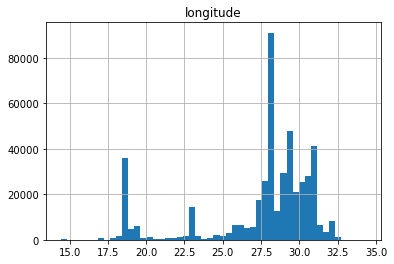

In [34]:
df0.hist(column='longitude', by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=50, backend=None)

__Latitude__

https://journeynorth.org/tm/LongitudeIntro.html#:~:text=Latitude%20lines%20are%20a%20numerical,equator%20a%20place%20is%20located.&text=Latitude%20locations%20are%20given%20as,%2C%20known%20as%20%22meridians%22.

Horizontal mapping lines on Earth are lines of latitude. They are known as "parallels" of latitude, because they run parallel to the equator. One simple way to visualize this might be to think about having imaginary horizontal "hula hoops" around the earth, with the biggest hoop around the equator, and then progressively smaller ones stacked above and below it to reach the North and South Poles. (Can you think of other ways to visualize the parallels of Latitude?)


Think about having imaginary horizontal "hula hoops" around the earth, with the biggest hoop around the equator, and then progressively smaller ones stacked above and below it to reach the North and South Poles


Latitude lines are a numerical way to measure how far north or south of the equator a place is located. The equator is the starting point for measuring latitude--that's why it's marked as 0 degrees latitude. The number of latitude degrees will be larger the further away from the equator the place is located, all the way up to 90 degrees latitude at the poles. Latitude locations are given as __ degrees North or __ degrees South.

array([[<AxesSubplot:title={'center':'latitude'}>]], dtype=object)

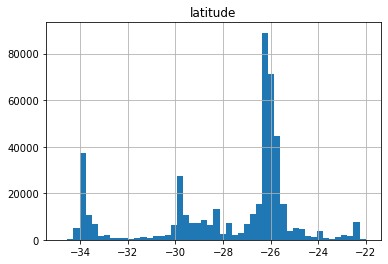

In [35]:
df0.hist(column='latitude', by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=50, backend=None)

In [36]:
ruh_m = plt.imread('/media/lnr-ai/christo/github_repos/logistics/maps/RiskEDA_map_2.png')

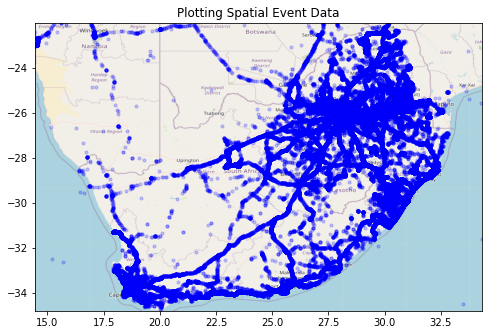

In [37]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df0.longitude, df0.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Event Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

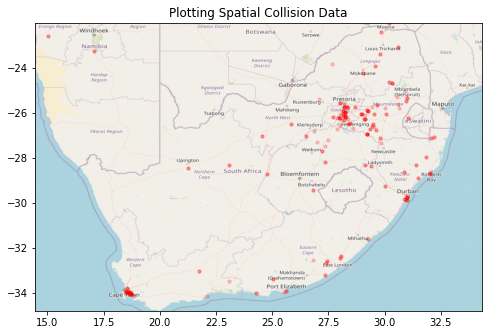

In [38]:
'Collision'
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df0[df0['collision_outcome']=='Collision'].longitude, df0[df0['collision_outcome']=='Collision'].latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Plotting Spatial Collision Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

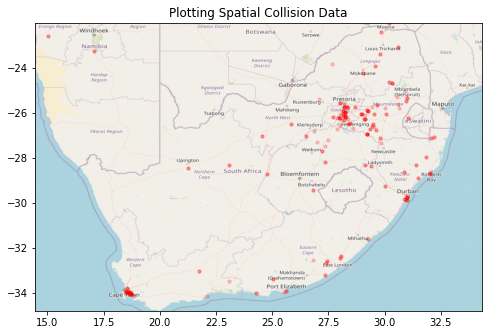

In [39]:
'Collision'
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df0[df0['collision_outcome']=='Collision'].longitude, df0[df0['collision_outcome']=='Collision'].latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Plotting Spatial Collision Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

Create a range of centiles from 0 to 1 defined by _length_ :

In [40]:
length=50
qrange=[x / length for x in range(0, length, 1)]

Bin __longitude__ into centiles as defined by qrange and calculate the midpoints, store in the column named __bin_longitude__ .  The bin label for each longitude is placed in __longitude_bins_labeled__

In [41]:
# https://pbpython.com/pandas-qcut-cut.html#:~:text=The%20major%20distinction%20is%20that,specifically%20define%20the%20bin%20edges.?
qcut_out,qcut_bins=pd.qcut(df0['longitude'],
                            q=qrange,
                            labels=False,
                            precision=0,retbins=True)
cut_out, cut_bins=pd.cut(x=df0['longitude'], bins=qcut_bins, right=True, labels=None, retbins=True, precision=3, include_lowest=False, duplicates='raise')
df0["longitude_bins_labeled"]=cut_out
df0["bin_longitude"] = df0["longitude_bins_labeled"].apply(lambda x: x.mid)

Bin __latitude__ into centiles as defined by qrange and calculate the midpoints, store in the column named __bin_latitude__ .  The bin label for each latitude is placed in __latitude_bins_labeled__

In [42]:
qcut_out,qcut_bins=pd.qcut(df0['latitude'],
                            q=qrange,
                            labels=False,
                            precision=0,retbins=True)
cut_out, cut_bins=pd.cut(x=df0['latitude'], bins=qcut_bins, right=True, labels=None, retbins=True, precision=3, include_lowest=False, duplicates='raise')
df0["latitude_bins_labeled"]=cut_out
df0["bin_latitude"] = df0["latitude_bins_labeled"].apply(lambda x: x.mid)
# df0["bins"].apply(lambda x: x.mid)

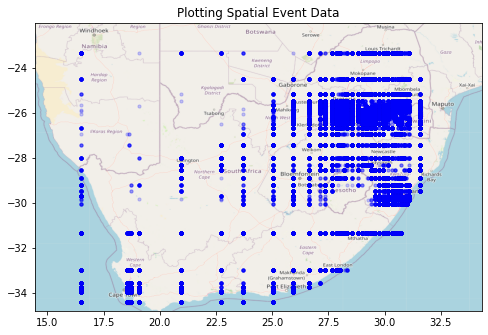

In [43]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df0.bin_longitude, df0.bin_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Event Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [44]:
pd.qcut(df0['longitude'],
                            q=qrange,
                            labels=False,
                            precision=0,retbins=True)

(0          3.0
 5         15.0
 6          3.0
 7          3.0
 8          3.0
           ... 
 615249    25.0
 615250    25.0
 615251    25.0
 615252    27.0
 615253    25.0
 Name: longitude, Length: 464057, dtype: float64,
 array([14.459, 18.533, 18.568, 18.664, 18.73 , 19.439, 22.461, 23.011,
        24.408, 25.621, 26.238, 27.023, 27.239, 27.499, 27.796, 27.885,
        27.972, 28.071, 28.117, 28.131, 28.135, 28.139, 28.168, 28.188,
        28.215, 28.276, 28.407, 28.729, 28.94 , 29.079, 29.139, 29.181,
        29.232, 29.318, 29.432, 29.479, 29.686, 29.842, 29.983, 30.048,
        30.225, 30.413, 30.553, 30.66 , 30.817, 30.919, 30.979, 31.014,
        31.186, 31.971]))

In [45]:
# hist, bin_edges = np.histogram(df0['longitude'].values, bins=50,density=True)

### er_serial_number

In [46]:
er_serial_number_list=list(set(df0['er_serial_number']))

In [47]:
df0[df0['er_serial_number']==er_serial_number_list[4]].shape

(11, 23)

In [48]:
df0[df0['er_serial_number']==er_serial_number_list[4]]

,=rowno(),"=if(rowno(TOTAL) <= 1000000,1,\r\n\tif(rowno(TOTAL) <= 2000000,2,\n \tif(rowno(TOTAL) <= 3000000,3,\n \tif(rowno(TOTAL) <= 4000000,4,\n \tif(rowno(TOTAL) <= 5000000,5,\n \tif(rowno(TOTAL) <= 6000000,6,\n \tif(rowno(TOTAL) <= 7000000,7,\n \tif(rowno(TOTAL) <= 8000000,8,\n \tif(rowno(TOTAL) <= 9000000,9,\n \tif(rowno(TOTAL) <= 10000000,10\n \t,11))))))))))",er_serial_number,trigger,fleet_number,license_number,company,behaviour_category,collision_outcome,event_date,...,response,event_day_seconds,dayofweek,Longitude_Latitude_conv,longitude,latitude,longitude_bins_labeled,bin_longitude,latitude_bins_labeled,bin_latitude
19188,-,1,ER91A50F,Rough/Uneven Surface,D753,HVP896MP,Barloworld - DriveReport,-,-,2020-04-07,...,0,74183,1,"28.608,-25.915",28.608,-25.915,"(28.407, 28.729]",28.5680,"(-25.919, -25.9]",-25.9095
19189,-,1,ER91A50F,Braking,D753,HVP896MP,Barloworld - DriveReport,-,-,2020-04-16,...,0,40097,3,"27.713,-26.166",27.713,-26.166,"(27.499, 27.796]",27.6475,"(-26.17, -26.151]",-26.1605
19190,-,1,ER91A50F,Braking,D753,HVP896MP,Barloworld - DriveReport,-,-,2020-04-18,...,0,23907,5,"28.747,-26.026",28.747,-26.026,"(28.729, 28.94]",28.8345,"(-26.044, -26.014]",-26.0290
19191,-,1,ER91A50F,Braking,D753,HVP896MP,Barloworld - DriveReport,Other Concerns,-,2020-04-27,...,0,39455,0,"27.713,-26.165",27.713,-26.165,"(27.499, 27.796]",27.6475,"(-26.17, -26.151]",-26.1605
19192,-,1,ER91A50F,-,D753,HVP896MP,Barloworld - DriveReport,-,-,2020-04-27,...,0,42950,0,"27.713,-26.165",27.713,-26.165,"(27.499, 27.796]",27.6475,"(-26.17, -26.151]",-26.1605
19193,-,1,ER91A50F,-,D753,HVP896MP,Barloworld - DriveReport,-,-,2020-04-27,...,0,42972,0,"27.713,-26.165",27.713,-26.165,"(27.499, 27.796]",27.6475,"(-26.17, -26.151]",-26.1605
19194,-,1,ER91A50F,-,D753,HVP896MP,Barloworld - DriveReport,-,-,2020-04-27,...,0,43012,0,"27.713,-26.164",27.713,-26.164,"(27.499, 27.796]",27.6475,"(-26.17, -26.151]",-26.1605
19195,-,1,ER91A50F,-,D753,HVP896MP,Barloworld - DriveReport,-,-,2020-04-27,...,0,43183,0,"27.713,-26.165",27.713,-26.165,"(27.499, 27.796]",27.6475,"(-26.17, -26.151]",-26.1605
19196,-,1,ER91A50F,-,D753,HVP896MP,Barloworld - DriveReport,-,-,2020-04-27,...,0,43210,0,"27.713,-26.165",27.713,-26.165,"(27.499, 27.796]",27.6475,"(-26.17, -26.151]",-26.1605
19197,-,1,ER91A50F,-,D753,HVP896MP,Barloworld - DriveReport,-,-,2020-04-27,...,0,43253,0,"27.713,-26.164",27.713,-26.164,"(27.499, 27.796]",27.6475,"(-26.17, -26.151]",-26.1605


### fleet_number

In [49]:
len(set(df0['fleet_number']))

15483

In [50]:
fleet_number_list=list(set(df0['fleet_number']))

In [51]:
df0[df0['fleet_number']==fleet_number_list[7]]

,=rowno(),"=if(rowno(TOTAL) <= 1000000,1,\r\n\tif(rowno(TOTAL) <= 2000000,2,\n \tif(rowno(TOTAL) <= 3000000,3,\n \tif(rowno(TOTAL) <= 4000000,4,\n \tif(rowno(TOTAL) <= 5000000,5,\n \tif(rowno(TOTAL) <= 6000000,6,\n \tif(rowno(TOTAL) <= 7000000,7,\n \tif(rowno(TOTAL) <= 8000000,8,\n \tif(rowno(TOTAL) <= 9000000,9,\n \tif(rowno(TOTAL) <= 10000000,10\n \t,11))))))))))",er_serial_number,trigger,fleet_number,license_number,company,behaviour_category,collision_outcome,event_date,...,response,event_day_seconds,dayofweek,Longitude_Latitude_conv,longitude,latitude,longitude_bins_labeled,bin_longitude,latitude_bins_labeled,bin_latitude
325037,-,1,ER948527,Braking,Fleet 9509,-,SG Coal - DriveRisk,-,-,2020-04-01,...,0,11089,2,"29.064,-26.017",29.064,-26.017,"(28.94, 29.079]",29.0095,"(-26.044, -26.014]",-26.0290
325038,-,1,ER948527,Cornering,Fleet 9509,-,SG Coal - DriveRisk,Other Concerns,-,2020-04-02,...,0,53502,3,"29.184,-26.195",29.184,-26.195,"(29.181, 29.232]",29.2065,"(-26.231, -26.19]",-26.2105
325039,-,1,ER948527,Cornering,Fleet 9509,-,SG Coal - DriveRisk,Traffic Violations,-,2020-04-02,...,0,53502,3,"29.184,-26.195",29.184,-26.195,"(29.181, 29.232]",29.2065,"(-26.231, -26.19]",-26.2105
325040,-,1,ER948527,Rough/Uneven Surface,Fleet 9509,-,SG Coal - DriveRisk,Other Concerns,-,2020-04-03,...,0,8062,4,"29.12,-26.285",29.120,-26.285,"(29.079, 29.139]",29.1090,"(-26.306, -26.267]",-26.2865
325041,-,1,ER948527,Cornering,Fleet 9509,-,SG Coal - DriveRisk,Other Concerns,-,2020-04-03,...,0,33528,4,"30.058,-25.716",30.058,-25.716,"(30.048, 30.225]",30.1365,"(-25.725, -25.659]",-25.6920
325042,-,1,ER948527,-,Fleet 9509,-,SG Coal - DriveRisk,-,-,2020-04-03,...,0,37842,4,"29.7,-26.162",29.700,-26.162,"(29.686, 29.842]",29.7640,"(-26.17, -26.151]",-26.1605
325043,-,1,ER948527,-,Fleet 9509,-,SG Coal - DriveRisk,-,-,2020-04-03,...,0,38597,4,"29.603,-26.269",29.603,-26.269,"(29.479, 29.686]",29.5825,"(-26.306, -26.267]",-26.2865
325044,-,1,ER948527,Braking,Fleet 9509,-,SG Coal - DriveRisk,Other Concerns,-,2020-04-04,...,0,9360,5,"30.119,-26.071",30.119,-26.071,"(30.048, 30.225]",30.1365,"(-26.1, -26.068]",-26.0840
325045,-,1,ER948527,Cornering,Fleet 9509,-,SG Coal - DriveRisk,Distraction,-,2020-04-04,...,0,14448,5,"29.713,-26.153",29.713,-26.153,"(29.686, 29.842]",29.7640,"(-26.17, -26.151]",-26.1605
325046,-,1,ER948527,Cornering,Fleet 9509,-,SG Coal - DriveRisk,Other Concerns,-,2020-04-04,...,0,14448,5,"29.713,-26.153",29.713,-26.153,"(29.686, 29.842]",29.7640,"(-26.17, -26.151]",-26.1605


In [52]:
df0.describe()

,"=if(rowno(TOTAL) <= 1000000,1,\r\n\tif(rowno(TOTAL) <= 2000000,2,\n \tif(rowno(TOTAL) <= 3000000,3,\n \tif(rowno(TOTAL) <= 4000000,4,\n \tif(rowno(TOTAL) <= 5000000,5,\n \tif(rowno(TOTAL) <= 6000000,6,\n \tif(rowno(TOTAL) <= 7000000,7,\n \tif(rowno(TOTAL) <= 8000000,8,\n \tif(rowno(TOTAL) <= 9000000,9,\n \tif(rowno(TOTAL) <= 10000000,10\n \t,11))))))))))",nEvents,response,event_day_seconds,dayofweek,longitude,latitude
count,464057.0,464057.000000,464057.000000,464057.000000,464057.000000,464057.000000,464057.000000
mean,1.0,1.000006,0.004898,39189.856477,2.742090,27.562382,-27.720927
std,0.0,0.002543,0.069815,19629.581670,1.800714,3.686498,2.950388
min,1.0,1.000000,0.000000,0.000000,0.000000,14.459000,-34.801000
25%,1.0,1.000000,0.000000,23668.000000,1.000000,27.364000,-29.549000
50%,1.0,1.000000,0.000000,37677.000000,3.000000,28.276000,-26.231000
75%,1.0,1.000000,0.000000,52842.000000,4.000000,29.904000,-25.913000
max,1.0,2.000000,1.000000,86399.000000,6.000000,34.324000,-22.001000


In [53]:
list(df0)

['=rowno()',
 '=if(rowno(TOTAL) <= 1000000,1,\r\n\tif(rowno(TOTAL) <= 2000000,2,\n    \tif(rowno(TOTAL) <= 3000000,3,\n        \tif(rowno(TOTAL) <= 4000000,4,\n            \tif(rowno(TOTAL) <= 5000000,5,\n                \tif(rowno(TOTAL) <= 6000000,6,\n                    \tif(rowno(TOTAL) <= 7000000,7,\n                        \tif(rowno(TOTAL) <= 8000000,8,\n                            \tif(rowno(TOTAL) <= 9000000,9,\n                                \tif(rowno(TOTAL) <= 10000000,10\n                                    \t,11))))))))))',
 'er_serial_number',
 'trigger',
 'fleet_number',
 'license_number',
 'company',
 'behaviour_category',
 'collision_outcome',
 'event_date',
 'event_time',
 'nEvents',
 'longitude_latitude',
 'response',
 'event_day_seconds',
 'dayofweek',
 'Longitude_Latitude_conv',
 'longitude',
 'latitude',
 'longitude_bins_labeled',
 'bin_longitude',
 'latitude_bins_labeled',
 'bin_latitude']

### Collision Response

In [54]:
set(df0.collision_outcome)

{'-', 'Collision', 'Near Collision', 'Possible Collision'}

In [55]:
df0[['er_serial_number','company','event_date','collision_outcome']]

,er_serial_number,company,event_date,collision_outcome
0,ER91A54F,Golden Arrow - DriveReport,2020-04-22,Collision
5,ER91D7C8,SBV Services - DriveReport,2020-04-24,Collision
6,ER91D476,Golden Arrow - DriveReport,2020-04-11,Collision
7,ER91E846,Golden Arrow - DriveReport,2020-04-25,Collision
8,ER91E846,Golden Arrow - DriveReport,2020-04-25,Collision
...,...,...,...,...
615249,SF80182327,Epic Distributors - DriveReport,2020-04-08,-
615250,SF80182330,SG Coal - DriveRisk,2020-04-07,-
615251,SF80182330,SG Coal - DriveRisk,2020-04-07,-
615252,SF80182330,SG Coal - DriveRisk,2020-04-30,-


In [56]:
list(df0)

['=rowno()',
 '=if(rowno(TOTAL) <= 1000000,1,\r\n\tif(rowno(TOTAL) <= 2000000,2,\n    \tif(rowno(TOTAL) <= 3000000,3,\n        \tif(rowno(TOTAL) <= 4000000,4,\n            \tif(rowno(TOTAL) <= 5000000,5,\n                \tif(rowno(TOTAL) <= 6000000,6,\n                    \tif(rowno(TOTAL) <= 7000000,7,\n                        \tif(rowno(TOTAL) <= 8000000,8,\n                            \tif(rowno(TOTAL) <= 9000000,9,\n                                \tif(rowno(TOTAL) <= 10000000,10\n                                    \t,11))))))))))',
 'er_serial_number',
 'trigger',
 'fleet_number',
 'license_number',
 'company',
 'behaviour_category',
 'collision_outcome',
 'event_date',
 'event_time',
 'nEvents',
 'longitude_latitude',
 'response',
 'event_day_seconds',
 'dayofweek',
 'Longitude_Latitude_conv',
 'longitude',
 'latitude',
 'longitude_bins_labeled',
 'bin_longitude',
 'latitude_bins_labeled',
 'bin_latitude']

In [57]:
driver_event_duration_df=pd.pivot_table(df0[['er_serial_number','company','event_date','collision_outcome','latitude']], 
                                        values='latitude', 
                    index=['er_serial_number','company','event_date'], 
                    columns=['collision_outcome'],
                    aggfunc='count',
                                       fill_value=0)

In [58]:
driver_event_duration_df.reset_index(inplace=True)
# [driver_event_duration_df.Collision>0]

In [59]:
driver_event_duration_df
collision_filter_list=(driver_event_duration_df.Collision>0) #|(driver_event_duration_df['Near Collision']>0)|(driver_event_duration_df['Possible Collision']>0)

In [60]:
company_collision_list=list(driver_event_duration_df[collision_filter_list]['company'])

In [61]:
driver_event_duration_df[driver_event_duration_df['company']==company_collision_list[0]]

collision_outcome,er_serial_number,company,event_date,-,Collision,Near Collision,Possible Collision
92,ER908A76,Reef Tankers - DriveReport,2020-04-01,4,0,0,0
93,ER908A76,Reef Tankers - DriveReport,2020-04-02,6,0,0,0
94,ER908A76,Reef Tankers - DriveReport,2020-04-03,3,0,0,0
95,ER908A76,Reef Tankers - DriveReport,2020-04-04,1,0,0,0
96,ER908A76,Reef Tankers - DriveReport,2020-04-07,1,0,0,0
...,...,...,...,...,...,...,...
62441,SF00029386,Reef Tankers - DriveReport,2020-04-10,3,0,0,0
62442,SF00029386,Reef Tankers - DriveReport,2020-04-18,1,0,0,0
62443,SF00029386,Reef Tankers - DriveReport,2020-04-21,1,0,0,0
62444,SF00029386,Reef Tankers - DriveReport,2020-04-22,1,0,0,0


In [62]:
list(df0)

['=rowno()',
 '=if(rowno(TOTAL) <= 1000000,1,\r\n\tif(rowno(TOTAL) <= 2000000,2,\n    \tif(rowno(TOTAL) <= 3000000,3,\n        \tif(rowno(TOTAL) <= 4000000,4,\n            \tif(rowno(TOTAL) <= 5000000,5,\n                \tif(rowno(TOTAL) <= 6000000,6,\n                    \tif(rowno(TOTAL) <= 7000000,7,\n                        \tif(rowno(TOTAL) <= 8000000,8,\n                            \tif(rowno(TOTAL) <= 9000000,9,\n                                \tif(rowno(TOTAL) <= 10000000,10\n                                    \t,11))))))))))',
 'er_serial_number',
 'trigger',
 'fleet_number',
 'license_number',
 'company',
 'behaviour_category',
 'collision_outcome',
 'event_date',
 'event_time',
 'nEvents',
 'longitude_latitude',
 'response',
 'event_day_seconds',
 'dayofweek',
 'Longitude_Latitude_conv',
 'longitude',
 'latitude',
 'longitude_bins_labeled',
 'bin_longitude',
 'latitude_bins_labeled',
 'bin_latitude']

In [63]:
f=max(df0.event_date)-pd.Timedelta(7, unit='D')

In [64]:
# df0.event_date>=df0.event_date&(df0.event_date>=max(df0.event_date)-pd.Timedelta(7, unit='D'))

In [65]:
driver_event_duration_df=pd.pivot_table(df0[['er_serial_number','company','event_date','trigger','latitude']], 
                                        values='latitude', 
                    index=['er_serial_number','company','event_date'], 
                    columns=['trigger'],
                    aggfunc='count',
                                       fill_value=0)

In [66]:
driver_event_duration_df[driver_event_duration_df.Accelerating>1]

,,trigger,-,Accelerating,Braking,Cornering,Other,Rough/Uneven Surface
er_serial_number,company,event_date,,,,,,
ER91237A,Sunrise Express - DriveReport,2020-04-01,5,2,0,0,0,0
ER91A623,Enviroserv - DriveReport,2020-04-22,0,2,3,0,0,0
ER921BE2,One Logix - DriveReport,2020-04-20,0,2,0,0,0,0
ER930091,Hestony Transport - DriveRisk,2020-04-14,0,2,0,1,2,0
ER94EF90,Barloworld - DriveReport,2020-04-24,0,2,4,13,1,0
...,...,...,...,...,...,...,...,...
SF80145373,The SPAR Group Limited - DriveRisk,2020-04-29,0,4,0,0,1,0
SF80145389,The SPAR Group Limited - DriveRisk,2020-04-19,0,2,0,0,0,0
SF80145391,The SPAR Group Limited - DriveRisk,2020-04-20,0,2,1,0,0,0


In [67]:
list(driver_event_duration_df)

['-', 'Accelerating', 'Braking', 'Cornering', 'Other', 'Rough/Uneven Surface']

In [68]:
list(df0)

['=rowno()',
 '=if(rowno(TOTAL) <= 1000000,1,\r\n\tif(rowno(TOTAL) <= 2000000,2,\n    \tif(rowno(TOTAL) <= 3000000,3,\n        \tif(rowno(TOTAL) <= 4000000,4,\n            \tif(rowno(TOTAL) <= 5000000,5,\n                \tif(rowno(TOTAL) <= 6000000,6,\n                    \tif(rowno(TOTAL) <= 7000000,7,\n                        \tif(rowno(TOTAL) <= 8000000,8,\n                            \tif(rowno(TOTAL) <= 9000000,9,\n                                \tif(rowno(TOTAL) <= 10000000,10\n                                    \t,11))))))))))',
 'er_serial_number',
 'trigger',
 'fleet_number',
 'license_number',
 'company',
 'behaviour_category',
 'collision_outcome',
 'event_date',
 'event_time',
 'nEvents',
 'longitude_latitude',
 'response',
 'event_day_seconds',
 'dayofweek',
 'Longitude_Latitude_conv',
 'longitude',
 'latitude',
 'longitude_bins_labeled',
 'bin_longitude',
 'latitude_bins_labeled',
 'bin_latitude']

In [69]:
response_df=pd.pivot_table(df0[['er_serial_number','company','event_date','response','latitude']], 
                                        values='latitude', 
                    index=['er_serial_number','company','event_date'], 
                    columns=['response'],
                    aggfunc='count',
                                       fill_value=0)

https://stackoverflow.com/questions/33899369/ranking-order-per-group-in-pandas

In [70]:
response_df.reset_index(inplace=True)

In [71]:
response_df.sort_values(by=['company','er_serial_number','event_date'])

response,er_serial_number,company,event_date,0,1
77010,SF80072327,360 Logistics - DriveReport,2020-04-03,2,0
77011,SF80072327,360 Logistics - DriveReport,2020-04-04,2,0
77012,SF80072327,360 Logistics - DriveReport,2020-04-07,2,0
77013,SF80072327,360 Logistics - DriveReport,2020-04-09,3,0
77014,SF80072327,360 Logistics - DriveReport,2020-04-10,1,0
...,...,...,...,...,...
78825,SF80074381,Zamalwandle Transport Logistics - DriveReport,2020-04-15,2,0
78826,SF80074381,Zamalwandle Transport Logistics - DriveReport,2020-04-19,1,0
78827,SF80074381,Zamalwandle Transport Logistics - DriveReport,2020-04-20,2,0
78828,SF80074381,Zamalwandle Transport Logistics - DriveReport,2020-04-23,1,0


In [72]:
response_df[response_df[1]>0]

response,er_serial_number,company,event_date,0,1
57,ER90860F,Unitrans - DriveReport,2020-04-07,3,1
152,ER908AB2,Golden Arrow - DriveReport,2020-04-10,0,1
306,ER908B0E,Tanker Services - DriveReport,2020-04-12,0,1
398,ER908B63,Reef Tankers - DriveReport,2020-04-15,4,4
478,ER908BA1,Unitrans - DriveReport,2020-04-17,8,1
...,...,...,...,...,...
109176,SF80145259,SG Coal - DriveRisk,2020-04-20,0,2
109380,SF80145301,The SPAR Group Limited - DriveRisk,2020-04-06,0,2
109426,SF80145304,Rusgenot Transport - DriveReport,2020-04-17,0,1
109444,SF80145307,The SPAR Group Limited - DriveRisk,2020-04-22,1,1


In [73]:
# df['franchise_rank']=df.groupby("merchant_45500_community")["merchant_rank"].rank("dense", ascending=False)
df0['event_date_rank']=df0.groupby(['er_serial_number','company'])["event_date"].rank("dense", ascending=False)

In [74]:
df0.groupby(['er_serial_number','company','event_date'])["event_date"]

In [84]:
(df0['er_serial_number']=='ER91A54F')&

0          True
5         False
6         False
7         False
8         False
          ...  
615249    False
615250    False
615251    False
615252    False
615253    False
Name: er_serial_number, Length: 464057, dtype: bool

In [83]:
df0[['er_serial_number','company','event_date','event_date_rank']]

,er_serial_number,company,event_date,event_date_rank
0,ER91A54F,Golden Arrow - DriveReport,2020-04-22,2.0
5,ER91D7C8,SBV Services - DriveReport,2020-04-24,3.0
6,ER91D476,Golden Arrow - DriveReport,2020-04-11,1.0
7,ER91E846,Golden Arrow - DriveReport,2020-04-25,1.0
8,ER91E846,Golden Arrow - DriveReport,2020-04-25,1.0
...,...,...,...,...
615249,SF80182327,Epic Distributors - DriveReport,2020-04-08,1.0
615250,SF80182330,SG Coal - DriveRisk,2020-04-07,2.0
615251,SF80182330,SG Coal - DriveRisk,2020-04-07,2.0
615252,SF80182330,SG Coal - DriveRisk,2020-04-30,1.0


In [75]:
df0[df0['event_date_rank']>1]

,=rowno(),"=if(rowno(TOTAL) <= 1000000,1,\r\n\tif(rowno(TOTAL) <= 2000000,2,\n \tif(rowno(TOTAL) <= 3000000,3,\n \tif(rowno(TOTAL) <= 4000000,4,\n \tif(rowno(TOTAL) <= 5000000,5,\n \tif(rowno(TOTAL) <= 6000000,6,\n \tif(rowno(TOTAL) <= 7000000,7,\n \tif(rowno(TOTAL) <= 8000000,8,\n \tif(rowno(TOTAL) <= 9000000,9,\n \tif(rowno(TOTAL) <= 10000000,10\n \t,11))))))))))",er_serial_number,trigger,fleet_number,license_number,company,behaviour_category,collision_outcome,event_date,...,event_day_seconds,dayofweek,Longitude_Latitude_conv,longitude,latitude,longitude_bins_labeled,bin_longitude,latitude_bins_labeled,bin_latitude,event_date_rank
0,-,1,ER91A54F,Other,4123,NaN,Golden Arrow - DriveReport,-,Collision,2020-04-22,...,62531,2,"18.718,-34.048",18.718,-34.048,"(18.664, 18.73]",18.6970,"(-34.801, -33.993]",-34.3970,2.0
5,-,1,ER91D7C8,Other,JN24NNGP,-,SBV Services - DriveReport,-,Collision,2020-04-24,...,39038,4,"27.901,-26.237",27.901,-26.237,"(27.885, 27.972]",27.9285,"(-26.267, -26.231]",-26.2490,3.0
17,-,1,ER94A98F,Other,B695,-,SG Coal - DriveRisk,-,Collision,2020-04-15,...,26107,2,"28.087,-26.322",28.087,-26.322,"(28.071, 28.117]",28.0940,"(-26.429, -26.306]",-26.3675,3.0
45,-,1,ER95BA48,Braking,HJ60KBGP,-,FruitSpot - DriveRisk,-,Collision,2020-04-14,...,48742,1,"32.047,-27.111",32.047,-27.111,NaN,NaN,"(-27.738, -27.11]",-27.4240,10.0
46,-,1,ER95BA48,Other,HJ60KBGP,-,FruitSpot - DriveRisk,-,Collision,2020-04-14,...,48742,1,"32.047,-27.111",32.047,-27.111,NaN,NaN,"(-27.738, -27.11]",-27.4240,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615230,-,1,SF80182248,Cornering,5133,-,SG Coal - DriveRisk,-,-,2020-04-28,...,77731,1,"29.607,-26.031",29.607,-26.031,"(29.479, 29.686]",29.5825,"(-26.044, -26.014]",-26.0290,2.0
615231,-,1,SF80182248,Cornering,5133,-,SG Coal - DriveRisk,-,-,2020-04-28,...,79308,1,"29.606,-26.029",29.606,-26.029,"(29.479, 29.686]",29.5825,"(-26.044, -26.014]",-26.0290,2.0
615232,-,1,SF80182248,Cornering,5133,-,SG Coal - DriveRisk,-,-,2020-04-28,...,81603,1,"29.606,-26.032",29.606,-26.032,"(29.479, 29.686]",29.5825,"(-26.044, -26.014]",-26.0290,2.0
615250,-,1,SF80182330,-,-,-,SG Coal - DriveRisk,-,-,2020-04-07,...,43529,1,"28.347,-26.134",28.347,-26.134,"(28.276, 28.407]",28.3415,"(-26.151, -26.128]",-26.1395,2.0


In [76]:
# ['=rowno()',
#  '=if(rowno(TOTAL) <= 1000000,1,\r\n\tif(rowno(TOTAL) <= 2000000,2,\n    \tif(rowno(TOTAL) <= 3000000,3,\n        \tif(rowno(TOTAL) <= 4000000,4,\n            \tif(rowno(TOTAL) <= 5000000,5,\n                \tif(rowno(TOTAL) <= 6000000,6,\n                    \tif(rowno(TOTAL) <= 7000000,7,\n                        \tif(rowno(TOTAL) <= 8000000,8,\n                            \tif(rowno(TOTAL) <= 9000000,9,\n                                \tif(rowno(TOTAL) <= 10000000,10\n                                    \t,11))))))))))',
#  'er_serial_number',
#  'trigger',
#  'fleet_number',
#  'license_number',
#  'company',
#  'behaviour_category',
#  'collision_outcome',
#  'event_date',
#  'event_time',
#  'nEvents',
#  'longitude_latitude',
#  'response',
#  'event_day_seconds',
#  'dayofweek',
#  'Longitude_Latitude_conv',
#  'longitude',
#  'latitude',
#  'longitude_bins_labeled',
#  'bin_longitude',
#  'latitude_bins_labeled',
#  'bin_latitude',
#  'event_date_rank']

In [77]:
set(df0['trigger'])

{'-', 'Accelerating', 'Braking', 'Cornering', 'Other', 'Rough/Uneven Surface'}

In [78]:
set(df0['behaviour_category'])

{'#Not Specified',
 '-',
 'Distraction',
 'Driver Condition',
 'Driver Conduct',
 'Other Concerns',
 'Poor Awareness',
 'Traffic Violations'}

In [79]:
set(df0['collision_outcome'])

{'-', 'Collision', 'Near Collision', 'Possible Collision'}

In [81]:
set(df0[df0['collision_outcome']=='-']['trigger'])

{'-', 'Accelerating', 'Braking', 'Cornering', 'Other', 'Rough/Uneven Surface'}

In [82]:
set(df0[df0['collision_outcome']=='-']['trigger'])

{'-', 'Accelerating', 'Braking', 'Cornering', 'Other', 'Rough/Uneven Surface'}

In [88]:
df0[['company','er_serial_number','event_date','event_date_rank']].sort_values(by=['company','er_serial_number','event_date','event_date_rank'])

,company,er_serial_number,event_date,event_date_rank
429141,360 Logistics - DriveReport,SF80072327,2020-04-03,13.0
429142,360 Logistics - DriveReport,SF80072327,2020-04-03,13.0
429143,360 Logistics - DriveReport,SF80072327,2020-04-04,12.0
429144,360 Logistics - DriveReport,SF80072327,2020-04-04,12.0
429145,360 Logistics - DriveReport,SF80072327,2020-04-07,11.0
...,...,...,...,...
441082,Zamalwandle Transport Logistics - DriveReport,SF80074381,2020-04-20,3.0
441083,Zamalwandle Transport Logistics - DriveReport,SF80074381,2020-04-20,3.0
441084,Zamalwandle Transport Logistics - DriveReport,SF80074381,2020-04-23,2.0
441085,Zamalwandle Transport Logistics - DriveReport,SF80074381,2020-04-24,1.0


#### Define the collision filter:

The date column is not unique as there may have been multiple different values for __trigger__, __behaviour_category__ and __collision_outcome__ per day.  
Hence once approach is to __PIVOT__ the event dataframe to aggregate on these columns and create a summary view by day.


In [156]:
behaviour_df=pd.pivot_table(df0[['er_serial_number','company','event_date','behaviour_category','latitude']], 
                                        values='latitude', 
                    index=['er_serial_number','company','event_date'], 
                    columns=['behaviour_category'],
                    aggfunc='count',
                                     fill_value=0)

behaviour_df.reset_index(inplace=True)

behaviour_df.rename(columns={'-':'behaviour_no_classification',
                                    '#Not Specified':'behaviour_not_specified',
                                    'Distraction':'behaviour_distraction',
                                    'Driver Condition':'behaviour_driver_condition',
                                    'Driver Conduct':'behaviour_driver_conduct',
                                    'Other Concerns':'behaviour_other_concerns',
                          'Poor Awareness':'behaviour_poor_awareness',
                          'Traffic Violations':'behaviour_traffic_violations'},inplace=True)

In [157]:
behaviour_df

behaviour_category,er_serial_number,company,event_date,behaviour_not_specified,behaviour_no_classification,behaviour_distraction,behaviour_driver_condition,behaviour_driver_conduct,behaviour_other_concerns,behaviour_poor_awareness,behaviour_traffic_violations
0,ER9085EE,Unitrans - DriveReport,2020-04-01,0,4,0,0,0,0,0,0
1,ER9085EE,Unitrans - DriveReport,2020-04-02,0,3,0,0,0,0,0,0
2,ER9085EE,Unitrans - DriveReport,2020-04-04,0,2,0,0,0,0,0,0
3,ER9085EE,Unitrans - DriveReport,2020-04-06,0,4,0,0,0,0,0,0
4,ER9085EE,Unitrans - DriveReport,2020-04-07,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109798,SF80182326,SG Coal - DriveRisk,2020-04-07,0,2,0,0,0,0,0,0
109799,SF80182327,Epic Distributors - DriveReport,2020-04-08,0,3,0,0,0,0,0,0
109800,SF80182330,SG Coal - DriveRisk,2020-04-07,0,2,0,0,0,0,0,0
109801,SF80182330,SG Coal - DriveRisk,2020-04-30,0,1,0,0,0,0,0,0


In [158]:
trigger_df=pd.pivot_table(df0[['er_serial_number','company','event_date','trigger','latitude']], 
                                        values='latitude', 
                    index=['er_serial_number','company','event_date'], 
                    columns=['trigger'],
                    aggfunc='count',
                                     fill_value=0)

trigger_df.reset_index(inplace=True)
trigger_df.rename(columns={'-':'no_trigger',
                                    'Accelerating':'trigger_accelerating',
                                    'Braking':'trigger_braking',
                                    'Cornering':'trigger_cornering',
                                    'Other':'trigger_other',
                                    'Rough/Uneven Surface':'trigger_rough_uneven_surface'},inplace=True)


In [161]:
summary_df=behaviour_df.merge(trigger_df, how='inner',left_on=['er_serial_number','company','event_date'],right_on=['er_serial_number','company','event_date'])

In [148]:
collision_outcome_df=pd.pivot_table(df0[['er_serial_number','company','event_date','collision_outcome','latitude']], 
                                        values='latitude', 
                    index=['er_serial_number','company','event_date'], 
                    columns=['collision_outcome'],
                    aggfunc='count',
                                       fill_value=0)
collision_outcome_df.reset_index(inplace=True)
collision_outcome_df.rename(columns={'-':'no_collision',
                                    'Collision':'collision',
                                    'Near Collision':'near_collision',
                                    'Possible Collision':'possible_collision'},
                           inplace=True)

In [162]:
summary_df=summary_df.merge(collision_outcome_df, how='inner',left_on=['er_serial_number','company','event_date'],right_on=['er_serial_number','company','event_date'])

In [163]:
list(summary_df)

['er_serial_number',
 'company',
 'event_date',
 'behaviour_not_specified',
 'behaviour_no_classification',
 'behaviour_distraction',
 'behaviour_driver_condition',
 'behaviour_driver_conduct',
 'behaviour_other_concerns',
 'behaviour_poor_awareness',
 'behaviour_traffic_violations',
 'no_trigger',
 'trigger_accelerating',
 'trigger_braking',
 'trigger_cornering',
 'trigger_other',
 'trigger_rough_uneven_surface',
 'no_collision',
 'collision',
 'near_collision',
 'possible_collision']

In [164]:
summary_df['event_date_rank']=summary_df.groupby(['er_serial_number','company'])["event_date"].rank("dense", ascending=False)

In [165]:
summary_df

,er_serial_number,company,event_date,behaviour_not_specified,behaviour_no_classification,behaviour_distraction,behaviour_driver_condition,behaviour_driver_conduct,behaviour_other_concerns,behaviour_poor_awareness,...,trigger_accelerating,trigger_braking,trigger_cornering,trigger_other,trigger_rough_uneven_surface,no_collision,collision,near_collision,possible_collision,event_date_rank
0,ER9085EE,Unitrans - DriveReport,2020-04-01,0,4,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,21.0
1,ER9085EE,Unitrans - DriveReport,2020-04-02,0,3,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,20.0
2,ER9085EE,Unitrans - DriveReport,2020-04-04,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,19.0
3,ER9085EE,Unitrans - DriveReport,2020-04-06,0,4,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,18.0
4,ER9085EE,Unitrans - DriveReport,2020-04-07,0,3,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109798,SF80182326,SG Coal - DriveRisk,2020-04-07,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,1.0
109799,SF80182327,Epic Distributors - DriveReport,2020-04-08,0,3,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,1.0
109800,SF80182330,SG Coal - DriveRisk,2020-04-07,0,2,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,2.0
109801,SF80182330,SG Coal - DriveRisk,2020-04-30,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0


In [ ]:
'collision',
 'near_collision',
 'possible_collision'

In [89]:
collision_filter=summary_df['collision']>0

In [106]:
previous_df0=df0[['company','er_serial_number','event_date_rank']].copy()

In [107]:
previous_df0['previous_event_date_rank']=previous_df0['event_date_rank']+1

In [108]:
df0[['event_date','event_date_rank']]

,event_date,event_date_rank
0,2020-04-22,2.0
5,2020-04-24,3.0
6,2020-04-11,1.0
7,2020-04-25,1.0
8,2020-04-25,1.0
...,...,...
615249,2020-04-08,1.0
615250,2020-04-07,2.0
615251,2020-04-07,2.0
615252,2020-04-30,1.0


In [109]:
previous_df0

,company,er_serial_number,event_date_rank,previous_event_date_rank
0,Golden Arrow - DriveReport,ER91A54F,2.0,3.0
5,SBV Services - DriveReport,ER91D7C8,3.0,4.0
6,Golden Arrow - DriveReport,ER91D476,1.0,2.0
7,Golden Arrow - DriveReport,ER91E846,1.0,2.0
8,Golden Arrow - DriveReport,ER91E846,1.0,2.0
...,...,...,...,...
615249,Epic Distributors - DriveReport,SF80182327,1.0,2.0
615250,SG Coal - DriveRisk,SF80182330,2.0,3.0
615251,SG Coal - DriveRisk,SF80182330,2.0,3.0
615252,SG Coal - DriveRisk,SF80182330,1.0,2.0


In [115]:
previous_df0=df0[['company','er_serial_number','event_date_rank','trigger','behaviour_category']].copy()
previous_df0['previous_event_date_rank']=previous_df0['event_date_rank']+1

In [118]:
previous_df0.drop('event_date_rank',axis=1,inplace=True)

In [119]:
previous_df0=df0[['company','er_serial_number','event_date','event_date_rank']].merge(previous_df0,left_on=['company','er_serial_number','event_date_rank'],right_on=['company','er_serial_number','previous_event_date_rank'],how='right')

In [120]:
previous_df0

,company,er_serial_number,event_date,event_date_rank,trigger,behaviour_category,previous_event_date_rank
0,Golden Arrow - DriveReport,ER91A54F,2020-04-22,2.0,Braking,-,2.0
1,Golden Arrow - DriveReport,ER91A54F,2020-04-22,2.0,Braking,-,2.0
2,Golden Arrow - DriveReport,ER91A54F,2020-04-22,2.0,Braking,-,2.0
3,SBV Services - DriveReport,ER91D7C8,2020-04-24,3.0,Braking,-,3.0
4,SBV Services - DriveReport,ER91D7C8,2020-04-24,3.0,Braking,-,3.0
...,...,...,...,...,...,...,...
3806273,Epic Distributors - DriveReport,SF80182327,NaT,NaN,-,-,2.0
3806274,Epic Distributors - DriveReport,SF80182327,NaT,NaN,-,-,2.0
3806275,SG Coal - DriveRisk,SF80182330,NaT,NaN,-,-,3.0
3806276,SG Coal - DriveRisk,SF80182330,NaT,NaN,-,-,3.0


In [121]:
df0

,=rowno(),"=if(rowno(TOTAL) <= 1000000,1,\r\n\tif(rowno(TOTAL) <= 2000000,2,\n \tif(rowno(TOTAL) <= 3000000,3,\n \tif(rowno(TOTAL) <= 4000000,4,\n \tif(rowno(TOTAL) <= 5000000,5,\n \tif(rowno(TOTAL) <= 6000000,6,\n \tif(rowno(TOTAL) <= 7000000,7,\n \tif(rowno(TOTAL) <= 8000000,8,\n \tif(rowno(TOTAL) <= 9000000,9,\n \tif(rowno(TOTAL) <= 10000000,10\n \t,11))))))))))",er_serial_number,trigger,fleet_number,license_number,company,behaviour_category,collision_outcome,event_date,...,event_day_seconds,dayofweek,Longitude_Latitude_conv,longitude,latitude,longitude_bins_labeled,bin_longitude,latitude_bins_labeled,bin_latitude,event_date_rank
0,-,1,ER91A54F,Other,4123,NaN,Golden Arrow - DriveReport,-,Collision,2020-04-22,...,62531,2,"18.718,-34.048",18.718,-34.048,"(18.664, 18.73]",18.6970,"(-34.801, -33.993]",-34.3970,2.0
5,-,1,ER91D7C8,Other,JN24NNGP,-,SBV Services - DriveReport,-,Collision,2020-04-24,...,39038,4,"27.901,-26.237",27.901,-26.237,"(27.885, 27.972]",27.9285,"(-26.267, -26.231]",-26.2490,3.0
6,-,1,ER91D476,Other,4289,CA534324,Golden Arrow - DriveReport,-,Collision,2020-04-11,...,65099,5,"18.692,-34.049",18.692,-34.049,"(18.664, 18.73]",18.6970,"(-34.801, -33.993]",-34.3970,1.0
7,-,1,ER91E846,Braking,4239,NaN,Golden Arrow - DriveReport,-,Collision,2020-04-25,...,69171,5,"18.717,-34.051",18.717,-34.051,"(18.664, 18.73]",18.6970,"(-34.801, -33.993]",-34.3970,1.0
8,-,1,ER91E846,Other,4239,NaN,Golden Arrow - DriveReport,-,Collision,2020-04-25,...,69171,5,"18.717,-34.051",18.717,-34.051,"(18.664, 18.73]",18.6970,"(-34.801, -33.993]",-34.3970,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615249,-,1,SF80182327,-,-,-,Epic Distributors - DriveReport,-,-,2020-04-08,...,52193,2,"28.347,-26.134",28.347,-26.134,"(28.276, 28.407]",28.3415,"(-26.151, -26.128]",-26.1395,1.0
615250,-,1,SF80182330,-,-,-,SG Coal - DriveRisk,-,-,2020-04-07,...,43529,1,"28.347,-26.134",28.347,-26.134,"(28.276, 28.407]",28.3415,"(-26.151, -26.128]",-26.1395,2.0
615251,-,1,SF80182330,-,-,-,SG Coal - DriveRisk,-,-,2020-04-07,...,44225,1,"28.347,-26.134",28.347,-26.134,"(28.276, 28.407]",28.3415,"(-26.151, -26.128]",-26.1395,2.0
615252,-,1,SF80182330,-,9569,-,SG Coal - DriveRisk,-,-,2020-04-30,...,29748,3,"28.815,-26.062",28.815,-26.062,"(28.729, 28.94]",28.8345,"(-26.068, -26.044]",-26.0560,1.0


### =================================================================================================================

## This is from the Bakers file

### Load the events log:

In [ ]:
fname='Bakers_Events.csv'
bakers_events_raw_df=pd.read_csv(filepath_or_buffer='/media/lnr-ai/christo/github_repos/logistics/data/{fname}'.format(fname=fname))

In [ ]:
bakers_events_list=['EventTypeId',
 'DriverId_u0',
 'Source',
 'GroupId',
 'AssetId_u0',
 'EventId',
 'EventDateTime',
 'OdometerKilometres_u0',
 'OdometerKilometresEnd_u0',
 'EventLatitude',
 'EventLongitude',
 'EventSpeed',
 'Value',
 'EventTotalTime',
 '__KEY_root',
 'Armed',
 'Priority',
 'Name',
 'EmployeeNumber',
 'Event Description']

In [ ]:
rename_columns={'EventLatitude':'EventLongitude','EventLongitude':'EventLatitude'}
bakers_events_raw_df.rename(columns=rename_columns,inplace=True)

In [ ]:
geo_filter=(bakers_events_raw_df.EventLatitude>0)&(bakers_events_raw_df.EventLongitude>-40)&(bakers_events_raw_df.EventLongitude<-22)
bakers_events_df=bakers_events_raw_df[geo_filter].copy()

In [ ]:
list(bakers_events_raw_df)

Create a list of unique employees in the bakers_events dataframe:

In [ ]:
event_employee_list=list(set(bakers_events_df[~bakers_events_df['EmployeeNumber'].isnull()]['EmployeeNumber']))

### Time conversions

Here we are interested in two new columns, __dayofweek__ which indicates which exactly that and __EventDaySeconds__ which is the time of day expressed in seconds.

Convert the EventDateTime column into a pandas datetime object and create two new columns, one being date and the other time only.

In [ ]:
# Remove 'T' from the Event Date Time column:
bakers_events_df['EventDateTime']=bakers_events_df['EventDateTime'].str.replace('T', ' ', regex=False)
# Remove '.000' from the Event Date Time column:
bakers_events_df['EventDateTime']=bakers_events_df['EventDateTime'].str.replace('.000', '', regex=False)
bakers_events_df['EventDateTime_Conv']=bakers_events_df['EventDateTime'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")))
bakers_events_df['EventDateTimeSeconds']=bakers_events_df['EventDateTime_Conv'].astype(int)
# Create date and time columns from EventDateTime:
bakers_events_df[['EventDate','EventTime']]=bakers_events_df['EventDateTime'].str.split(' ', expand=True)

In [ ]:
bakers_events_df['EventDate']=bakers_events_df['EventDate'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d")))

Create the EventDateSeconds column.  This is the number of seconds since the start of the day.  From here we can work out the time of day for any event.

In [ ]:
bakers_events_df['EventDateSeconds']=bakers_events_df['EventDate'].astype(int)
bakers_events_df['EventDateSeconds']=bakers_events_df['EventDateSeconds'].astype(int)

In [ ]:
bakers_events_df['EventDateSeconds']

In [ ]:
bakers_events_df['EventDaySeconds']=(bakers_events_df['EventDateTimeSeconds']-bakers_events_df['EventDateSeconds'])/10e8
bakers_events_df['EventDaySeconds']=bakers_events_df['EventDaySeconds'].astype(int)

In [ ]:
bakers_events_df['EventDaySeconds']

In [ ]:
bakers_events_df['dayofweek']=bakers_events_df['EventDateTime_Conv'].dt.dayofweek

### Geolocational data:


Plot the positional data of all events:

In [ ]:
minEventLatitude=min(bakers_events_df['EventLatitude'])
maxEventLatitude=max(bakers_events_df['EventLatitude'])

In [ ]:
minEventLatitude=min(bakers_events_df['EventLongitude'])
maxEventLatitude=max(bakers_events_df['EventLongitude'])

In [ ]:
BBox = ((bakers_events_df.EventLongitude.min(),   bakers_events_df.EventLongitude.max(),      
         bakers_events_df.EventLatitude.min(), bakers_events_df.EventLatitude.max()))

In [ ]:
BBox

In [ ]:
bakers_events_df.EventLatitude.min()

In [ ]:
BBox

In [ ]:
bakers_events_df.hist(column='EventLongitude', by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=50, backend=None)

In [ ]:
bakers_events_df.hist(column='EventLatitude', by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=50, backend=None)

In [ ]:
ruh_m = plt.imread('/media/lnr-ai/christo/github_repos/logistics/maps/map.png')

In [ ]:
bakers_events_df['Event Description']

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(bakers_events_df['Event Description'])

In [ ]:
bakers_events_df['event_encoded']=le.transform(bakers_events_df['Event Description'])

In [ ]:
list(bakers_events_df)

In [ ]:
groups = bakers_events_df.groupby('Event Description')
fig, ax = plt.subplots(figsize = (8,7))
for name, group in groups:
    print(name,group.EventLongitude,group.EventLatitude)
    ax.scatter(group.EventLatitude,group.EventLongitude,  zorder=1, alpha= 0.2, c=group.event_encoded, s=10)
ax.set_title('Baker event date on South African Map')
ax.set_xlim(BBox[2],BBox[3])
ax.set_ylim(BBox[0],BBox[1])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
plt.legend()

In [ ]:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)

plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(bakers_events_df.EventLatitude,bakers_events_df.EventLongitude,  zorder=1, alpha= 0.2, c=bakers_events_df['event_encoded'], s=10)
ax.set_title('Baker event date on South African Map')
ax.set_xlim(BBox[2],BBox[3])
ax.set_ylim(BBox[0],BBox[1])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(bakers_events_df.EventLongitude, bakers_events_df.EventLatitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[2],BBox[3])
ax.set_ylim(BBox[0],BBox[1])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### Aggregation and Pivotting:

1.The following Pivots the bakers_events_df dataframe on DriverId_u0 (so by driver) to reveal the total duration all instances of a particular type of event for a certain driver and assigns to driver_event_duration_df:

In [ ]:
driver_event_duration_df=pd.pivot_table(bakers_events_df, values='EventTotalTime', 
                    index=['EmployeeNumber'], 
                    columns='Event Description',
                    aggfunc='sum')

Rename columns with a duration prefix:

In [ ]:
driver_event_duration_list=list(driver_event_duration_df)
rename_dict={}
for column_name in driver_event_duration_list:
    rename_dict[column_name]=column_name+'_duration'
driver_event_duration_df.rename(columns=rename_dict,inplace=True)

In [ ]:
driver_event_duration_df.fillna(0,inplace=True)

2.Create the aggregation on count:

In [ ]:
driver_event_count_df=pd.pivot_table(bakers_events_df, values='EventTotalTime', 
                    index=['EmployeeNumber'], 
                    columns='Event Description',
                    aggfunc='count')

Rename columns with a \_count postfix:

In [ ]:
driver_event_count_list=list(driver_event_count_df)
rename_dict={}
for column_name in driver_event_count_list:
    rename_dict[column_name]=column_name+'_count'
driver_event_count_df.rename(columns=rename_dict,inplace=True)

In [ ]:
driver_event_count_df.fillna(0,inplace=True)

3.Create aggregation on the maximum duration:

In [ ]:
driver_event_maxduration_df=pd.pivot_table(bakers_events_df, values='EventTotalTime', 
                    index=['EmployeeNumber'], 
                    columns='Event Description',
                    aggfunc='max')

In [ ]:
driver_event_maxduration_list=list(driver_event_maxduration_df)
rename_dict={}
for column_name in driver_event_maxduration_list:
    rename_dict[column_name]=column_name+'_max'
driver_event_maxduration_df.rename(columns=rename_dict,inplace=True)

In [ ]:
driver_event_maxduration_df.fillna(0,inplace=True)

In [ ]:
driver_event_meanduration_df=pd.pivot_table(bakers_events_df, values='EventTotalTime', 
                    index=['EmployeeNumber'], 
                    columns='Event Description',
                    aggfunc='mean')

In [ ]:
driver_event_meanduration_list=list(driver_event_meanduration_df)
rename_dict={}
for column_name in driver_event_maxduration_list:
    rename_dict[column_name]=column_name+'_mean'
driver_event_meanduration_df.rename(columns=rename_dict,inplace=True)

In [ ]:
driver_event_meanduration_df.fillna(0,inplace=True)

Merge the duration,count,max and mean dataframes:

In [ ]:
driver_event_df=driver_event_count_df.merge(driver_event_duration_df,left_index=True,right_index=True)
driver_event_df=driver_event_df.merge(driver_event_maxduration_df,left_index=True,right_index=True)
driver_event_df=driver_event_df.merge(driver_event_meanduration_df,left_index=True,right_index=True)

In [ ]:
driver_event_df.head()

In [ ]:
event_employee_list=list(set(bakers_events_df[~bakers_events_df['EmployeeNumber'].isnull()]['EmployeeNumber']))

In [ ]:
driver_event_df.shape

In [ ]:
driver_event_df.reset_index(inplace=True)

### Load the accident log:

In [ ]:
filename='Copy of Accident Log.xlsx'
sheet_name='BT L'
# sheet_name='Fuel Consumption & Events Data'
accident_log_df=pd.read_excel('/media/lnr-ai/christo/github_repos/logistics/data/{filename}'.format(filename=filename), sheet_name=sheet_name)

In [ ]:
accident_log_df=accident_log_df[~accident_log_df['Mix Id Match'].isnull()].copy()
accident_log_df.shape

In [ ]:
list(accident_log_df)

In [ ]:
max(accident_log_df['Date Of Accident'])

In [ ]:
# Remove 'T' from the Event Date Time column:
accident_log_df['EventDateTime']=accident_log_df['EventDateTime'].str.replace('T', ' ', regex=False)
# Remove '.000' from the Event Date Time column:
bakers_events_df['EventDateTime']=bakers_events_df['EventDateTime'].str.replace('.000', '', regex=False)
bakers_events_df['EventDateTime_Conv']=bakers_events_df['EventDateTime'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")))
bakers_events_df['EventDateTimeSeconds']=bakers_events_df['EventDateTime_Conv'].astype(int)
# Create date and time columns from EventDateTime:
bakers_events_df[['EventDate','EventTime']]=bakers_events_df['EventDateTime'].str.split(' ', expand=True)

In [ ]:
bakers_events_df['EventDate']=bakers_events_df['EventDate'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%d")))

Create the EventDateSeconds column.  This is the number of seconds since the start of the day.  From here we can work out the time of day for any event.

In [ ]:
bakers_events_df['EventDateSeconds']=bakers_events_df['EventDate'].astype(int)
bakers_events_df['EventDateSeconds']=bakers_events_df['EventDateSeconds'].astype(int)

In [ ]:
bakers_events_df['EventDateSeconds']

In [ ]:
bakers_events_df['EventDaySeconds']=(bakers_events_df['EventDateTimeSeconds']-bakers_events_df['EventDateSeconds'])/10e8
bakers_events_df['EventDaySeconds']=bakers_events_df['EventDaySeconds'].astype(int)

In [ ]:
bakers_events_df['EventDaySeconds']

In [ ]:
bakers_events_df['dayofweek']=bakers_events_df['EventDateTime_Conv'].dt.dayofweek

In [ ]:
accident_log_list=list(accident_log_df)

In [ ]:
# accident_log_df.merge(bakers_events_df,left_on='Emp No',right_on='EmployeeNumber')

In [ ]:
bakers_events_df.dtypes

In [ ]:
accident_log_df.dtypes

In [ ]:
accident_log_df['Mix Id Match']=accident_log_df['Mix Id Match'].astype(int)

In [ ]:
accident_log_list=['Mix EmployeeNo',
 'MiX Employee Name',
 'Mix Id Match',
 'Claim No.',
 'Emp No',
 'ID Number',
 'Date Of Accident',
 'Date Reported',
 'Time',
 'Full Accident Details',
 'Severity Indication',
 'Horse Reg',
 'T1 Reg',
 'T2 Reg',
 'Asset No. Horse',
 'Asset No. T1',
 'Asset No. T2',
 'Loaded From',
 'Loaded With',
 'Destined To',
 'Customer KPI Infringement',
 'Vehicle Type',
 'Vehicle Category',
 'Vehicle Site',
 'Driver Name',
 'Driver Based At',
 'Age',
 'Date of Employment',
 'Years employed at Bakers',
 'Place',
 'Province',
 'City/Town',
 'Highway/Street Name',
 'Driver Injury',
 'Driver Fatality',
 'T/P Injury',
 'T/P Fatality',
 'Pedestrian Injury',
 'Pedestrian Fatality',
 'Potential Negligence',
 'Road Condition',
 'Root Cause Category',
 'Root Cause Analysis',
 'Description Catergory',
 'Avoidance (Added)',
 'Negligence (Added)',
 'RTMS Related (Added)',
 'Event',
 'Damage/s/d',
 'Est Cost of Accident (Incl Damage Control & 3rd Party Damages)',
 'EXCESS (Primary)',
 'SECTION II EXCESS',
 'SETTLEMENT',
 'TP SETTLED',
 'OUTSTANDING',
 'TP/OWN RECOVERY',
 'SALVAGE WORTH',
 'Minor Damages & Damage Control (Bakers Personal Capacity)',
 'SALVAGE EST SELLING PRICE']

In [ ]:
# fname='Bakers_Events.csv'
# Bakers_Events_df=pd.read_csv(filepath_or_buffer='/media/lnr-ai/christo/github_repos/logistics/data/{fname}'.format(fname=fname))

Create a list of unique employees in the accident dataframe:

In [ ]:
accident_employee_list=list(set(accident_log_df['Emp No']))

In [ ]:
len(accident_employee_list)

In [ ]:
len(intersection(lst1=event_employee_list, lst2=accident_employee_list))

In [ ]:
len(event_employee_list)

In [ ]:
1-64/926

Create a list of unique employees in the accident report and ALSO in the event dataframe:

In [ ]:
accident_event_employee_list=intersection(lst1=event_employee_list, lst2=accident_employee_list)

In [ ]:
driver_event_df['accident']=0

In [ ]:
driver_event_df.loc[driver_event_df['EmployeeNumber'].isin(accident_event_employee_list),'accident']=1

In [ ]:
driver_event_df.shape

In [ ]:
list(driver_event_df)

In [ ]:
driver_event_df.to_csv('/media/lnr-ai/christo/github_repos/logistics/data/driver_event_train_df.csv',index=False)

In [ ]:
accident_log_df[accident_log_df['Emp No']==accident_event_employee_list[1]]

In [ ]:
min(bakers_events_df[bakers_events_df.EmployeeNumber==accident_event_employee_list[1]]['EventDateTime'])

### -----------------------------------------------------------------------------------------------------------------

In [ ]:
Bakers_Events_df.EventLongitude

In [ ]:
set(Bakers_Events_df['Event Description'])

In [ ]:
list(Bakers_Events_df)

In [ ]:
pd.pivot_table(Bakers_Events_df, values='EventTotalTime', 
                    index=['DriverId_u0'], 
                    columns='Event Description',
                    aggfunc='sum')

In [ ]:
# Using readline() 
file_name='/media/lnr-ai/christo/github_repos/logistics/data/{fname}'.format(fname=fname)

In [ ]:
file1 = open(file_name, 'r') 
count = 0
  
while count<1000: 
    count += 1
  
    # Get next line from file 
    line = file1.readline() 
  
    # if line is empty 
    # end of file is reached 
    if not line: 
        break
    print("Line{}: {}".format(count, line.strip())) 
  
file1.close() 

In [ ]:
pd.read_html(io=file_name)

In [ ]:
print(file_name)

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
parse = ET.parse(file_name)

In [ ]:
from bs4 import BeautifulSoup

with open(file_name) as fp:
#     soup = BeautifulSoup(fp, 'xml')
    soup = BeautifulSoup(fp, 'lxml',from_encoding='Latin-1')

In [ ]:
fname='Site.csv (txt)'
fname='Organisation.csv (txt)'
file_name='/media/lnr-ai/christo/github_repos/logistics/data/{fname}'.format(fname=fname)

In [ ]:
from bs4 import BeautifulSoup

with open(file_name) as fp:
#     soup = BeautifulSoup(fp, 'xml')
    soup = BeautifulSoup(fp, 'xml')

In [ ]:
soup

In [ ]:
print(soup.prettify())

In [ ]:
pd.read_html(file_name)